# We will be removing features which are highly correlated

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Covariance 

### consider we have 2 random variables 
### sales = [100,150,300] and price = [10,20,40]
### so price increases as sales increases
## cov(x,y) = (1/n) * (sum i to n ((xi - ux) * (yi-uy)))
### hence cov is +ve if both x and y increases
### cov is -ve if x increase and y decreases
### but we dont know how much -ve or +ve cov we have

# Pearson coefficient
###  person cc = (cov(x,y))/(std(x) *std(y))
### With covariance we find the direction of the relationship but not the strength of the relationship
### for person coefficient value will be between -1 and +1
### if pearson coefficitent is 1 for let say X and Y then it means both the features are same and we can drop one of the feature


# Spearman's rank correlation
### spearman(x,y) = (cov(rank(x),rank(y)))/(std(x) * std(y))
### how to find rank ?
### sort the data of X -> create a new column rank xi in the form of ascending order i.e the lowest value will have rank 1 and so on. for y just give rank dont sort.
### create another column di i.e difference between rank of xi and rank of yi then square it
###  spearman correlation = 1 - ((6*sum(di^2))/n(n^2-1))


In [2]:
#Laoding the datasets
data = load_boston()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['MEDV'] = data.target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df.drop(labels = ['MEDV'],axis=1)
Y = df['MEDV']

In [5]:
# Separating the data into training and testign
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [6]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [7]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.209601,0.411853,-0.060396,0.433767,-0.223751,0.365361,-0.389669,0.644199,0.600869,0.307048,-0.433588,0.455918
ZN,-0.209601,1.000000,-0.545477,-0.042937,-0.519324,0.318149,-0.557026,0.668999,-0.315995,-0.319439,-0.468630,0.176817,-0.415956
INDUS,0.411853,-0.545477,1.000000,0.064991,0.758117,-0.384803,0.647476,-0.710918,0.583793,0.701452,0.408441,-0.351344,0.577368
CHAS,-0.060396,-0.042937,0.064991,1.000000,0.080815,0.104614,0.105739,-0.104260,-0.021695,-0.045450,-0.119630,0.053370,-0.053850
NOX,0.433767,-0.519324,0.758117,0.080815,1.000000,-0.287276,0.730050,-0.768231,0.613232,0.666152,0.217940,-0.389542,0.558742
RM,-0.223751,0.318149,-0.384803,0.104614,-0.287276,1.000000,-0.240865,0.186063,-0.203512,-0.281683,-0.376986,0.154249,-0.605382
AGE,0.365361,-0.557026,0.647476,0.105739,0.730050,-0.240865,1.000000,-0.736003,0.453714,0.498767,0.292243,-0.266334,0.602467
DIS,-0.389669,0.668999,-0.710918,-0.104260,-0.768231,0.186063,-0.736003,1.000000,-0.492998,-0.533016,-0.272573,0.292709,-0.471930
RAD,0.644199,-0.315995,0.583793,-0.021695,0.613232,-0.203512,0.453714,-0.492998,1.000000,0.913943,0.476006,-0.443103,0.464271
TAX,0.600869,-0.319439,0.701452,-0.045450,0.666152,-0.281683,0.498767,-0.533016,0.913943,1.000000,0.465424,-0.441482,0.507145


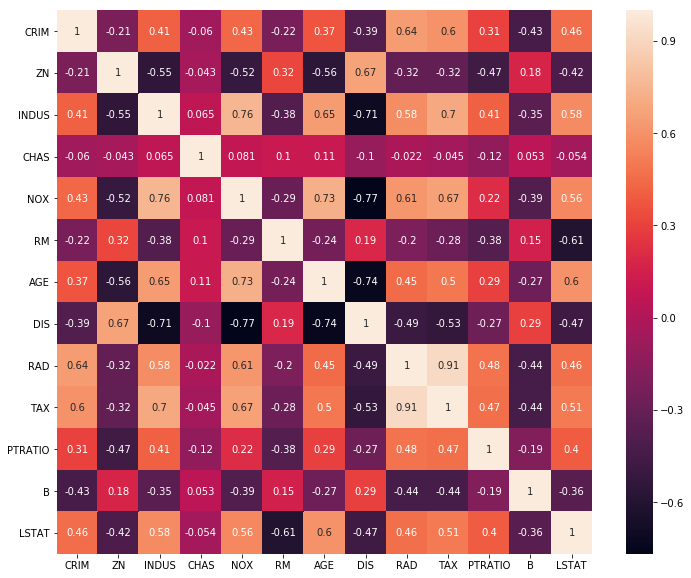

In [8]:
import seaborn as sns
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [9]:
def getCorrelation(dataset,threshold):
    cols_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                cols_corr.add(corr_matrix.columns[i])
    return cols_corr

In [10]:
corr_features = getCorrelation(X_train,0.7) 
# We will do it only for X_train not on X_test to prevent overfitting. if we find that the features are highly correlated we will drop it from X_train and X_test both.


In [11]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [12]:
#Dropping the features
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
374,18.49820,0.0,18.10,0.0,4.138,24.0,20.2,396.90,37.97
158,1.34284,0.0,19.58,0.0,6.066,5.0,14.7,353.89,6.43
495,0.17899,0.0,9.69,0.0,5.670,6.0,19.2,393.29,17.60
266,0.78570,20.0,3.97,0.0,7.014,5.0,13.0,384.07,14.79
100,0.14866,0.0,8.56,0.0,6.727,5.0,20.9,394.76,9.42
205,0.13642,0.0,10.59,0.0,5.891,4.0,18.6,396.90,10.87
234,0.44791,0.0,6.20,1.0,6.726,8.0,17.4,360.20,8.05
489,0.18337,0.0,27.74,0.0,5.414,4.0,20.1,344.05,23.97
292,0.03615,80.0,4.95,0.0,6.630,4.0,19.2,396.90,4.70
396,5.87205,0.0,18.10,0.0,6.405,24.0,20.2,396.90,19.37


# Doing the above for santander dataset

In [13]:
df = pd.read_csv('train.csv')

In [14]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [15]:
X = df.drop(labels=['TARGET'],axis=1)
X

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.00,195.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
5,13,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000
6,14,2,27,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000
7,18,2,26,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000
8,20,2,45,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000
9,23,2,25,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000


In [16]:
Y = df['TARGET']
Y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
75990    0
75991    0
75992    0
75993    0
75994    0
75995    0
75996    0
75997    0
75998    0
75999    0
76000    1
76001    0
76002    0
76003    0
76004    0
76005    0
76006    0
76007    1
76008    0
76009    0
76010    0
76011    0
76012    0
76013    0
76014    0
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [18]:
corr = X_train.corr()
corr

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,-0.001730,-0.000437,-0.003450,-0.003018,-0.005473,-0.008475,-0.008584,-0.006052,-0.005493,...,-0.006391,0.002037,0.003898,-0.001719,-0.001553,-0.004756,-0.003933,-0.001048,0.000410,-0.004760
var3,-0.001730,1.000000,-0.004811,0.001769,0.005968,0.006754,0.001476,0.001674,0.000520,0.000593,...,0.000210,0.000738,0.000503,0.000663,0.000693,0.000626,0.000538,0.000749,0.000785,-0.000199
var15,-0.000437,-0.004811,1.000000,0.040066,0.098138,0.104493,0.043981,0.051920,0.008060,0.008861,...,0.011261,0.030379,0.016981,0.029975,0.030598,0.029535,0.020202,0.033383,0.033721,0.012109
imp_ent_var16_ult1,-0.003450,0.001769,0.040066,1.000000,0.040731,0.034112,0.008801,0.006527,0.000824,0.003048,...,-0.000283,-0.000868,-0.000636,-0.000535,-0.000520,0.003129,-0.000634,0.005783,0.007578,0.000892
imp_op_var39_comer_ult1,-0.003018,0.005968,0.098138,0.040731,1.000000,0.892318,0.352656,0.306681,0.029320,0.052547,...,-0.001158,0.018252,0.013387,0.013555,0.014774,0.011143,0.006360,0.013538,0.012741,0.012931
imp_op_var39_comer_ult3,-0.005473,0.006754,0.104493,0.034112,0.892318,1.000000,0.318515,0.359514,0.028658,0.053752,...,-0.001194,0.031506,0.025054,0.020676,0.023065,0.010142,0.007404,0.012465,0.011676,0.014871
imp_op_var40_comer_ult1,-0.008475,0.001476,0.043981,0.008801,0.352656,0.318515,1.000000,0.855574,0.061715,0.111854,...,-0.000202,0.003619,0.007497,0.001993,0.003014,-0.000414,-0.000499,-0.000202,-0.000320,0.007570
imp_op_var40_comer_ult3,-0.008584,0.001674,0.051920,0.006527,0.306681,0.359514,0.855574,1.000000,0.058713,0.123355,...,-0.000226,0.006956,0.012557,0.003849,0.005701,-0.000552,-0.000559,-0.000477,-0.000568,0.009214
imp_op_var40_efect_ult1,-0.006052,0.000520,0.008060,0.000824,0.029320,0.028658,0.061715,0.058713,1.000000,0.886351,...,-0.000072,-0.000239,-0.000163,-0.000216,-0.000225,-0.000212,-0.000177,-0.000255,-0.000267,-0.000403
imp_op_var40_efect_ult3,-0.005493,0.000593,0.008861,0.003048,0.052547,0.053752,0.111854,0.123355,0.886351,1.000000,...,-0.000082,-0.000272,-0.000186,-0.000246,-0.000257,-0.000241,-0.000202,-0.000290,-0.000304,0.001007


In [19]:
def getCorrelation(dataset,threshold):
     cols_corr = set()
     corr = dataset.corr()
     for i in range(len(corr.columns)):
            for j in range(i):
                if abs(corr.iloc[i,j]) > threshold:
                    cols_corr.add(corr.columns[i])
     return cols_corr


In [26]:
constant_columns = getCorrelation(X_train,0.8)

In [27]:
len(set(constant_columns))

203

In [28]:
X_train.drop(constant_columns,axis=1)
X_test.drop(constant_columns,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,...,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_medio_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38
33415,66830,2,24,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,117310.979016
51152,102116,2,44,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,57663.840000
58343,116447,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,90186.270000
22122,44302,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,113416.590000
35478,70933,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,180871.410000
21384,42829,2,32,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,84925.650000
44290,88657,2,24,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,159354.600000
74526,148832,2,49,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,68933.580000
12808,25666,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,117310.979016
27519,55083,2,25,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,69561.210000
